### _Dataset is already made in the MLP notebok_

In [1]:
import pickle

pickle_X = open('X.pickle','rb')
pickle_y = open('y.pickle','rb')

X = pickle.load(pickle_X)
y = pickle.load(pickle_y)


In [2]:
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.optimizers import SGD
from keras.utils import np_utils


C:\Users\Mahe\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
(X_train,X_test) = (X[:542],X[542:])
(y_train,y_test) = (y[:542],y[542:])

In [4]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [5]:
num_classes = 2
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)
print(y_test.shape)

(542, 2)
(135, 2)


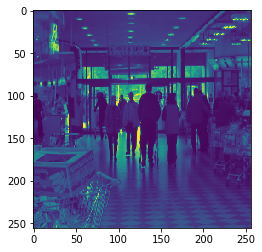

In [7]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(np.squeeze(X_train[4]))

In [8]:
y_train[4]

array([1., 0.], dtype=float32)

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,Flatten

In [10]:
model= Sequential()
model.add(Conv2D(filters = 16 , kernel_size =2 , padding = 'same',activation='relu', input_shape = (256,256,1)))
model.add(MaxPool2D(pool_size = 2 ))
model.add(Conv2D(filters = 32 , kernel_size =2 , padding = 'same'))
model.add(MaxPool2D(pool_size = 2 ))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(2,activation="softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 256, 256, 16)      80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 32)      2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0         
__________

In [11]:
model.compile(loss='categorical_crossentropy',optimizer="rmsprop",metrics=['accuracy'])

In [13]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath = 'Modelbest.hdf5',verbose=1,save_best_only=True)

hist = model.fit(X_train,y_train,batch_size=32,epochs=100,validation_split=0.2,verbose=2 ,shuffle=True,callbacks=[checkpoint])

Train on 433 samples, validate on 109 samples
Epoch 1/100
 - 70s - loss: 2.6872 - acc: 0.5404 - val_loss: 0.6837 - val_acc: 0.6147

Epoch 00001: val_loss improved from inf to 0.68369, saving model to Modelbest.hdf5
Epoch 2/100
 - 37s - loss: 0.6815 - acc: 0.5866 - val_loss: 0.6383 - val_acc: 0.6972

Epoch 00002: val_loss improved from 0.68369 to 0.63826, saving model to Modelbest.hdf5
Epoch 3/100
 - 37s - loss: 0.6301 - acc: 0.6559 - val_loss: 0.7730 - val_acc: 0.3670

Epoch 00003: val_loss did not improve from 0.63826
Epoch 4/100
 - 36s - loss: 0.5684 - acc: 0.7367 - val_loss: 0.6445 - val_acc: 0.6422

Epoch 00004: val_loss did not improve from 0.63826
Epoch 5/100
 - 36s - loss: 0.4855 - acc: 0.7921 - val_loss: 0.6690 - val_acc: 0.5780

Epoch 00005: val_loss did not improve from 0.63826
Epoch 6/100
 - 36s - loss: 0.3910 - acc: 0.8406 - val_loss: 0.6882 - val_acc: 0.6972

Epoch 00006: val_loss did not improve from 0.63826
Epoch 7/100
 - 38s - loss: 0.2916 - acc: 0.8984 - val_loss: 0.77

 - 47s - loss: 2.8368e-06 - acc: 1.0000 - val_loss: 3.1409 - val_acc: 0.6147

Epoch 00059: val_loss did not improve from 0.63826
Epoch 60/100
 - 47s - loss: 2.8199e-06 - acc: 1.0000 - val_loss: 3.1872 - val_acc: 0.6422

Epoch 00060: val_loss did not improve from 0.63826
Epoch 61/100
 - 46s - loss: 3.3184e-06 - acc: 1.0000 - val_loss: 3.1796 - val_acc: 0.6422

Epoch 00061: val_loss did not improve from 0.63826
Epoch 62/100
 - 47s - loss: 9.9023e-05 - acc: 1.0000 - val_loss: 3.5518 - val_acc: 0.6606

Epoch 00062: val_loss did not improve from 0.63826
Epoch 63/100
 - 47s - loss: 0.3568 - acc: 0.9677 - val_loss: 2.6140 - val_acc: 0.5872

Epoch 00063: val_loss did not improve from 0.63826
Epoch 64/100
 - 47s - loss: 7.0561e-05 - acc: 1.0000 - val_loss: 2.6561 - val_acc: 0.5688

Epoch 00064: val_loss did not improve from 0.63826
Epoch 65/100
 - 48s - loss: 9.6506e-05 - acc: 1.0000 - val_loss: 2.6786 - val_acc: 0.5872

Epoch 00065: val_loss did not improve from 0.63826
Epoch 66/100
 - 48s - l

In [14]:
model.load_weights("Modelbest.hdf5")

In [16]:
score = model.evaluate(X_test,y_test,verbose=0)
print("accuracy is {}".format(score[1]))

y_hat = model.predict(X_test)

accuracy is 0.6518518522933677


In [20]:
print(score[1]*100)

65.18518522933677
